In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
cattle_ml_path = "/Users/matthewvicario/Desktop/Project3/Output/cattle_ml.csv"
cattle_ml_data = pd.read_csv(cattle_ml_path)
cattle_ml_data

,Unnamed: 0,Year,Cattle Load,Cattle Loss,Cattle Pct
0,0,13,100395.0,126.0,0.125504
1,1,14,1276490.0,1638.0,0.128321
2,2,15,1297203.0,1359.0,0.104764
3,3,16,1138035.0,1534.0,0.134794
4,4,17,862226.0,875.0,0.101482
5,5,18,1113685.0,1327.0,0.119154
6,6,19,1243740.0,1231.0,0.098976


In [8]:
cattle_ml_data = cattle_ml_data[["Year","Cattle Pct"]]
cattle_ml_data = cattle_ml_data.rename(columns={"Cattle Pct": "Cattle_Pct"})
cattle_ml_data

,Year,Cattle_Pct
0,13,0.125504
1,14,0.128321
2,15,0.104764
3,16,0.134794
4,17,0.101482
5,18,0.119154
6,19,0.098976


In [9]:
cattle_ml_data["Cattle_Pct"]=cattle_ml_data["Cattle_Pct"].round(4)
cattle_ml_data

,Year,Cattle_Pct
0,13,0.1255
1,14,0.1283
2,15,0.1048
3,16,0.1348
4,17,0.1015
5,18,0.1192
6,19,0.0990


In [11]:
X = cattle_ml_data.Year.values.reshape(-1, 1)
y = cattle_ml_data.Cattle_Pct

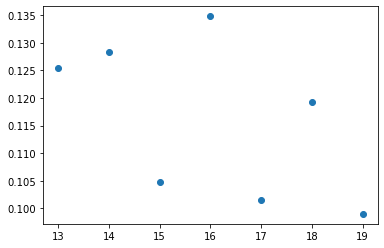

In [12]:
plt.scatter(X, y)

In [13]:
from sklearn.linear_model import LinearRegression
model =  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model

LinearRegression()

In [14]:
model.fit(X, y)
print(model)

LinearRegression()


In [15]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [-0.00360714]
y-axis intercept:  0.17387142857142857


In [16]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 0.1255
Predicted output: 0.12697857142857144
Prediction Error: 0.0014785714285714402


In [17]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,0.126979,0.1255,0.001479
1,0.123371,0.1283,-0.004929
2,0.119764,0.1048,0.014964
3,0.116157,0.1348,-0.018643
4,0.112550,0.1015,0.011050
5,0.108943,0.1192,-0.010257
6,0.105336,0.0990,0.006336


In [18]:
x_min = X.min()
x_max = X.max()

In [19]:
y_min_actual = y.min()
y_max_actual = y.max()

In [20]:
y_min = 0.17387142857142857 + -0.00360714 * x_min
y_max = 0.17387142857142857 + -0.00360714 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0.099
Calculated Min Value: 0.12697860857142856
Actual Max Value: 0.1348
Calculated Max Value: 0.10533576857142857


In [21]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 0.099
Predicted Min Value: [0.12697857]
Actual Max Value: 0.1348
Predicted Max Value: [0.10533571]


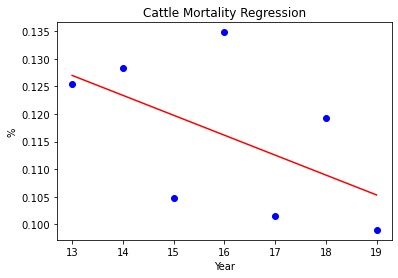

In [28]:
plt.scatter(X, y, c='blue')
plt.title("Cattle Mortality Regression")
plt.xlabel("Year")
plt.ylabel("%")
plt.plot([x_min, x_max], [y_min, y_max], c='red')